In [1]:
#start all integration scripts like this

import sys
sys.path.append('/home/pwahle/Organoid-Image-Analysis/scripts/modules')
#alternative to sys.append('...'):
#set PYTHONPATH; in ~/.bashrc add below last line: export PYTHONPATH=/home/<your username>/Organoid-Image-Analysis/scripts/modules
#this option doesn't work for me.

import yaml 
import Paths #all kinds of paths, image paths are functions with default variables plate = "plate6", cycle = 'cycle1'; aligned_images_path has no variable 'cylce'. 

#load parameters
with open("../../params.yml", 'r') as ymlfile: 
    cfg = yaml.load(ymlfile, Loader=yaml.FullLoader)
    
globals().update(cfg) # optional, 'activates' all parameters

In [78]:
from skimage import io
from matplotlib import pyplot as plt
from skimage import filters
import os
import cv2 as cv
import numpy as np
import matplotlib
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
import copy
from skimage.feature import blob_log

folder = "/links/groups/treutlein/DATA/imaging/PW/4i/plate6/cycle2/stitched"

img = io.imread(os.path.join(folder, "MAX_Time00000_Point0000_Point00{ii}_ChannelSCF_SD.tif"))

dapi = img[2500:3500,2000:3000,2]
membrane = img[2500:3500,2000:3000,1]

#dapi = dapi[200:400,720:920]
#membrane = membrane[200:400,720:920]

In [79]:
import Example

In [80]:
dapi_scale = Example.scale_image(dapi)
membrane_scale = Example.scale_image(membrane)

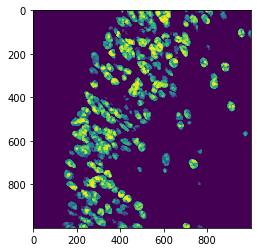

In [88]:
subtracted = dapi_scale - membrane_scale


threshold = threshold_otsu(subtracted)
subtracted[subtracted < threshold] = 0
subtracted = Example.scale_image(subtracted)

from skimage import morphology

selem =  morphology.disk(4)
res = morphology.white_tophat(subtracted, selem)

so_rem = subtracted - res
plt.imshow(so_rem)

plt.imshow(so_rem)

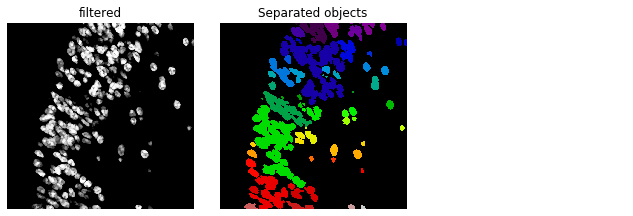

In [89]:
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max

filtered = filters.gaussian(so_rem, sigma=0.4, preserve_range=True, truncate = 3)
#distance = ndi.distance_transform_edt(subtracted)
local_maxi = peak_local_max(filtered, indices=False, footprint=np.ones((2, 2)),
                            labels=filtered)
markers = ndi.label(local_maxi)[0]
labels = watershed(-filtered, markers, mask=filtered)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(filtered, cmap=plt.cm.gray)
ax[0].set_title('filtered')
ax[1].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[1].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

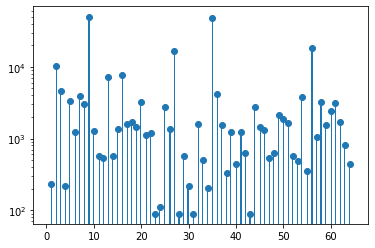

In [205]:
'''for i in np.unique(np.sort(np.ravel(labels))):
    test = copy.copy(labels)
    test[test != i] = 0 
    plt.imshow(test)
    plt.figure(i+1)
    
plt.show()'''


hist = np.ravel(labels)[np.ravel(labels) > 0]
plt.hist(hist, 265)
plt.show

summary_hist = np.histogram(hist, bins = np.append(np.unique(hist),[65]))

plt.scatter( summary_hist[1][0:64],summary_hist[0])
plt.yscale('log')

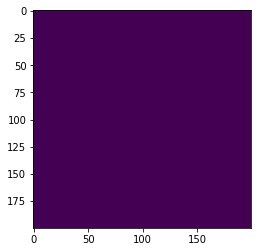

In [43]:
test = copy.copy(labels)
test[test !=113] = 0 

for i in 
plt.imshow(test)

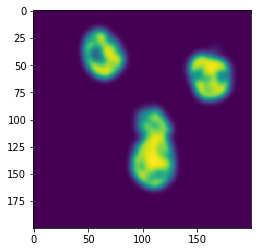